# SD DSL Operators

This document illustrates how to use the operators for the SD DSL. T use the operators, you need to import the `sd_functions`, in addition to importing the `Model` class.

## MAX Operator

The `max` operator always chooses the larger of its two input values.

In [2]:
from BPTK_Py import Model
from BPTK_Py import sd_functions as sd

In [2]:
model = Model(starttime=0,stoptime=10,dt=1,name='max')

In [3]:
stock = model.stock("stock")

In [5]:
stock.initial_value=0.0

In [6]:
inflow = model.flow("inflow")

In [7]:
constant = model.constant("constant")

In [8]:
constant.equation = 1.0

In [9]:
inflow.equation = sd.max(constant,stock)

In [10]:
stock.equation = inflow

In [11]:
stock(10)

512.0

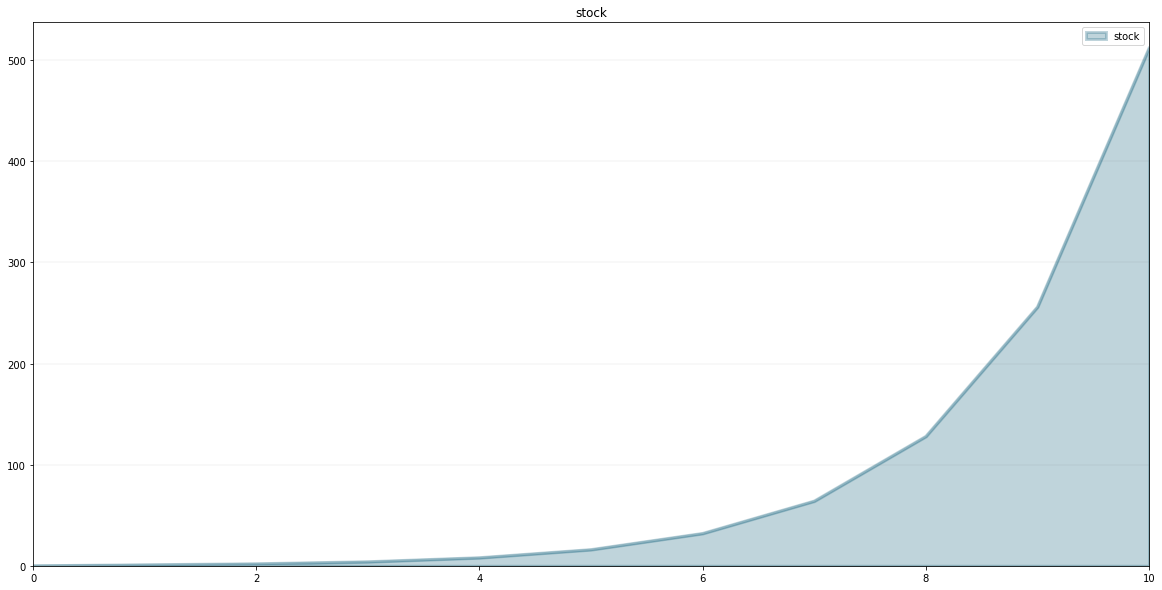

In [12]:
stock.plot()

## MIN Operator

The `min` operator always chooses the smaller of its two input values.

In [2]:
from BPTK_Py import Model
from BPTK_Py import sd_functions as sd

In [34]:
model = Model(starttime=0,stoptime=10,dt=1,name='min')

In [35]:
stock = model.stock("stock")

In [36]:
stock.initial_value=0.0

In [37]:
inflow = model.flow("inflow")

In [38]:
constant = model.constant("constant")

In [39]:
constant.equation = 1.0

In [40]:
inflow.equation = sd.min(constant,stock)

In [41]:
stock.equation = inflow

In [42]:
stock(10)

0.0

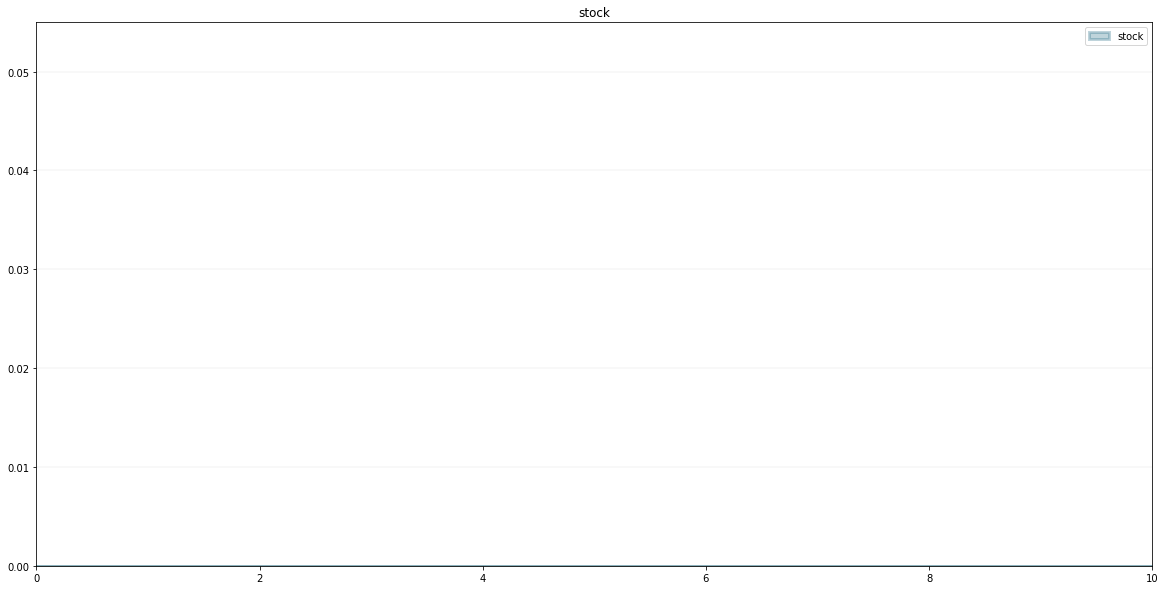

In [43]:
stock.plot()

## TIME operator

The `time` operator returns the current simulation time.

In [2]:
from BPTK_Py import Model
from BPTK_Py import sd_functions as sd

In [45]:
model = Model(starttime=0,stoptime=10,dt=1,name='time')

In [46]:
stock = model.stock("stock")

In [47]:
stock.initial_value=0.0

In [48]:
inflow = model.flow("inflow")

In [49]:
inflow.equation = sd.time()

In [50]:
stock.equation = inflow

In [52]:
inflow(9)

9

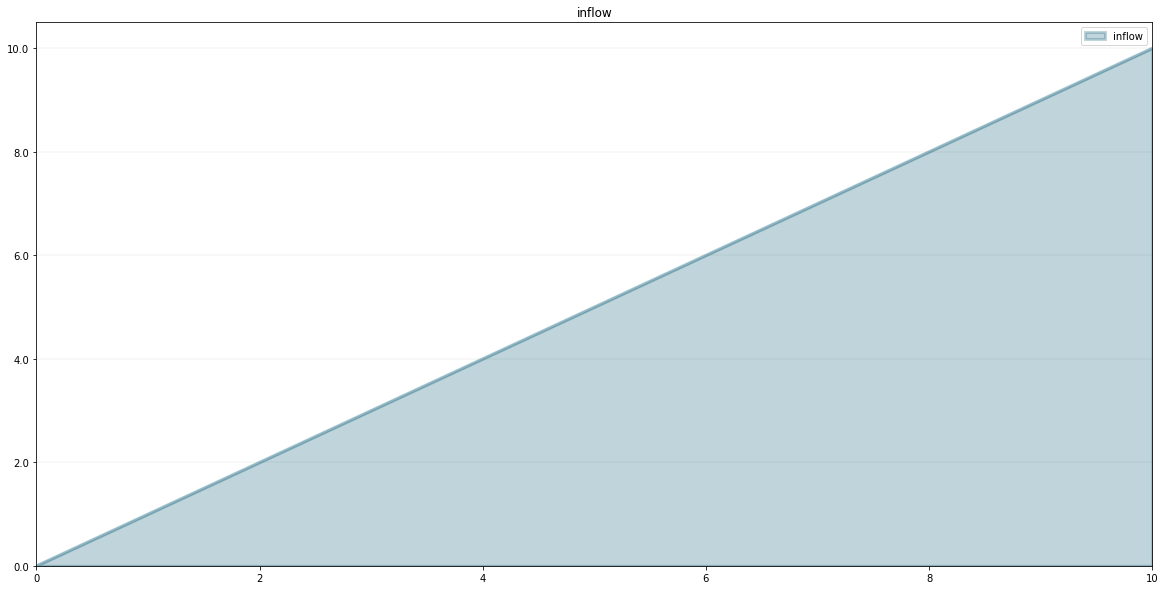

In [53]:
inflow.plot()

## TREND operator

The TREND operator calculates the trend in input, based on the value of input, the first order exponential average of input, and the exponential averaging time averaging time. TREND is expressed as the fractional change in input per unit time. If you don't specify an initial value initial, TREND substitutes the value 0 for the initial value of the trend.

In [16]:
from BPTK_Py import Model
from BPTK_Py import sd_functions as sd

model = Model(starttime=1,stoptime=10,dt=1,name='trend')

average_input = model.stock("average_input")

input_function = model.converter("input_function")

input_function.equation=sd.time()

average_input.initial_value=input_function

averaging_time = model.constant("averaging_time")

averaging_time.equation=1.0

change_in_average = model.flow("change_in_average")

change_in_average.equation=(input_function-average_input)/averaging_time

average_input.equation=change_in_average

trend_in_input = model.converter("trend_in_input")

trend_in_input.equation = (input_function-average_input)/(average_input*averaging_time)

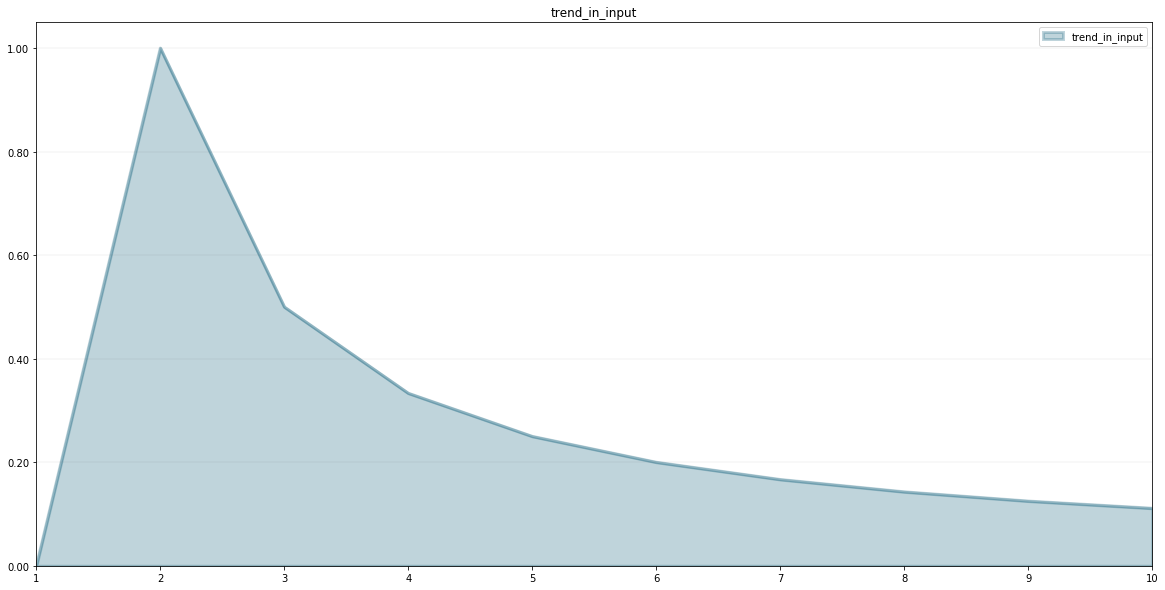

In [17]:
trend_in_input.plot()

In [18]:
trend_in_input.plot(return_df=True)

,trend_in_input
1,0.000000
2,1.000000
3,0.500000
4,0.333333
5,0.250000
6,0.200000
7,0.166667
8,0.142857
9,0.125000
10,0.111111
